# Digit Recognizer

Target: Take an image of a handwritten single digit, and determine what that digit is.

Source: https://www.kaggle.com/c/digit-recognizer

In [1]:
# data manipulation
import numpy as np

# PyTorch imports
import torch 
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transform
from torch.utils.data import DataLoader as dloader

# data visualisation, live training loss plot
import matplotlib.pyplot as plt

In [2]:
# set parameters
n_epoch = 2
batch_size = 128
learning_rate = 0.001
n_workers = 1

In [3]:
# define transform
transform = transform.Compose(
    [transform.ToTensor(),
     transform.Normalize((0.1307,), (0.3081,))])

In [4]:
# define dataset and dataloader
train_dset = dset.MNIST(root = './data', train = True,
                        download = True, transform = transform)
test_dset = dset.MNIST(root = './data', train = False,
                        download = True, transform = transform)

train_loader = dloader(train_dset, batch_size = batch_size, 
                       shuffle = True, num_workers = n_workers)
test_loader = dloader(test_dset, batch_size = batch_size, 
                       shuffle = False, num_workers = n_workers)

In [5]:
# some information
sample_img = iter(train_loader)
images, labels = sample_img.next()

# shape
print(images.shape)

# length
print(len(train_dset))
print(len(test_dset[0][0]))

torch.Size([128, 1, 28, 28])
60000
1


In [6]:
#print random digit
def random_digits():
    
    plt.figure(figsize = (10, 10))
   
    rand_indexes = np.random.randint(0, images.shape[0], 12)
    for index,im_index in enumerate(rand_indexes):
        plt.subplot(4, 4, index+1)
        plt.imshow(images[im_index][0], cmap = 'summer', interpolation = 'none')
        plt.title('Class %d' % labels[im_index])
    plt.tight_layout()

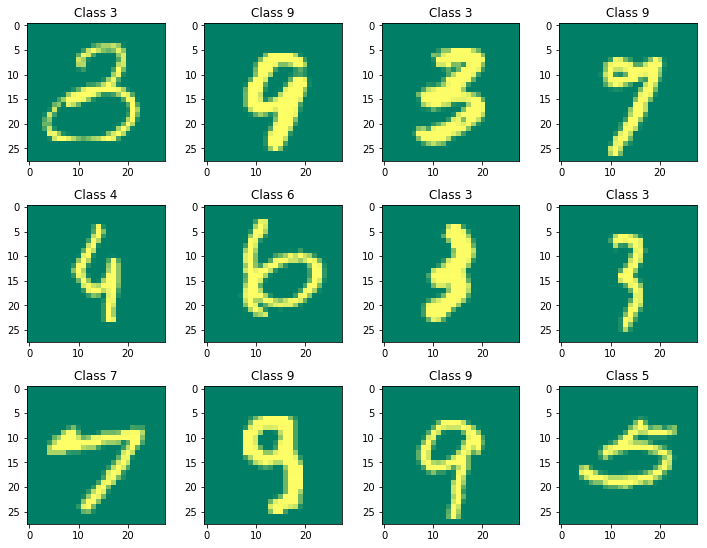

In [7]:
random_digits()

In [8]:
class MNISTnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size = 3, padding = 2),
            nn.Conv2d(32, 32, kernel_size = 3, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size = 3, padding = 2),
            nn.Conv2d(64, 64, kernel_size = 3, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = 3, padding = 2),
            nn.Conv2d(128, 128, kernel_size = 3, padding = 2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25))
        self.fc_1 = nn.Linear(7*7*128, 1000)
        self.fc_2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc_1(out)
        out = self.fc_2(out)
        return out

In [9]:
# initialize net 
mnist_net = MNISTnet()

# loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mnist_net.parameters(),
                      lr = learning_rate)

In [10]:
# train the network
train_losses = []

for epoch in range(n_epoch):
    for idx, (images, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = mnist_net(images)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        if idx % 128 == 0:
            print('Epoch: %d, Iteration: %d, Loss: %.4f' 
                  % (epoch + 1, idx + 1, loss.item()))

Epoch: 1, Iteration: 1, Loss: 2.3006
Epoch: 1, Iteration: 129, Loss: 2.3022
Epoch: 1, Iteration: 257, Loss: 2.3039
Epoch: 1, Iteration: 385, Loss: 2.3015
Epoch: 2, Iteration: 1, Loss: 2.3037
Epoch: 2, Iteration: 129, Loss: 2.3009
Epoch: 2, Iteration: 257, Loss: 2.2996
Epoch: 2, Iteration: 385, Loss: 2.2969
